# TW5


## A simple classification task with Naive Bayes classifier & ROC curve

Xiaomei Xie

Lili Hao

## Part 0:

Read and run each cell of the example. 

### Setup

In [133]:
%matplotlib notebook
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sn
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."

CHAPTER_ID = 'Naive Bayesian'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 1. Sythetic Datasets

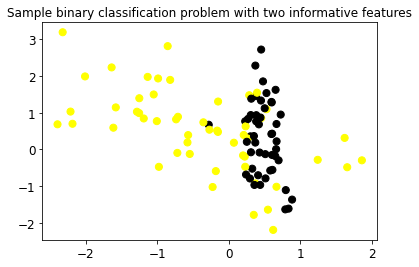

In [134]:
# synthetic dataset for classification (binary)

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

plt.figure()
plt.title('Sample binary classification problem with two informative features')

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker= 'o', c=y, s=50, cmap=cmap_bold)
plt.show()

## Naive Bayes classifiers

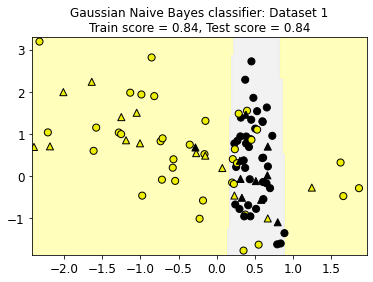

In [135]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)

plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

In [136]:
nbclf.score(X_test, y_test)

0.84

In [137]:
y_pred = nbclf.predict(X_test)

# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

[[12  3]
 [ 1  9]]


In [138]:
# Print classification report
target_names = ['Class 0', 'Class 1']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

              precision    recall  f1-score   support

     Class 0       0.92      0.80      0.86        15
     Class 1       0.75      0.90      0.82        10

    accuracy                           0.84        25
   macro avg       0.84      0.85      0.84        25
weighted avg       0.85      0.84      0.84        25



## ROC Curve

Accuracy =  0.8600000000000001


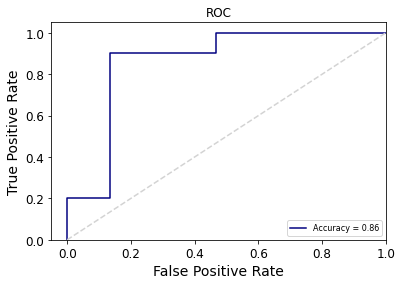

In [139]:
from sklearn.metrics import roc_curve, auc
y_score = nbclf.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)
print('Accuracy = ', roc_auc)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 2. Application to a real-world dataset¶

- Breast Canver dataset


In [140]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

print(X_cancer)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [141]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train2, y_train2)

print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train2, y_train2)))

print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test2, y_test2)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


### accuracy in training dataset

In [142]:
y_pred2 = nbclf.predict(X_train2)


target_names = list(cancer.target_names)
# plot a confusion matrix
confusion_mat = confusion_matrix(y_train2, y_pred2)

print(confusion_mat)

# Print classification report


result_metrics = classification_report(y_train2, y_pred2, target_names=target_names)

print(result_metrics)

[[142  17]
 [  4 263]]
              precision    recall  f1-score   support

   malignant       0.97      0.89      0.93       159
      benign       0.94      0.99      0.96       267

    accuracy                           0.95       426
   macro avg       0.96      0.94      0.95       426
weighted avg       0.95      0.95      0.95       426



### accuracy in testing dataset

In [143]:
y_pred2 = nbclf.predict(X_test2)


target_names = list(cancer.target_names)

# plot a confusion matrix
print(confusion_mat)

# Print classification report
result_metrics = classification_report(y_test2, y_pred2, target_names=target_names)

print(result_metrics)

[[142  17]
 [  4 263]]
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        53
      benign       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [144]:
y_score2 = nbclf.predict_proba(X_test2) 

In [145]:
print(y_score2.shape)

(143, 2)


In [146]:
 y_score2[:,1]

array([1.66114173e-006, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 1.00000000e+000, 4.46064296e-007, 9.99999988e-001,
       1.00000000e+000, 6.39182809e-004, 6.28226453e-002, 2.51766439e-014,
       9.41283356e-001, 7.46964953e-057, 1.31238633e-040, 2.31097572e-121,
       1.06247517e-012, 3.58558008e-014, 9.99999999e-001, 1.00000000e+000,
       8.87213589e-045, 1.00000000e+000, 1.00000000e+000, 2.57966976e-018,
       1.00000000e+000, 9.94926498e-062, 1.00000000e+000, 3.27379161e-055,
       9.99999210e-001, 2.79390332e-011, 1.00000000e+000, 4.35444449e-004,
       1.00000000e+000, 6.21887259e-042, 1.00000000e+000, 1.08247773e-014,
       9.79467574e-001, 1.00000000e+000, 4.16194621e-003, 1.00000000e+000,
       5.60678994e-002, 3.59594013e-147, 1.00000000e+000, 1.00000000e+000,
       1.00000000e+000, 3.52803449e-018, 1.29947447e-099, 8.65966562e-009,
       1.62287648e-035, 1

### ROC Curve

Accuracy =  0.990146750524109


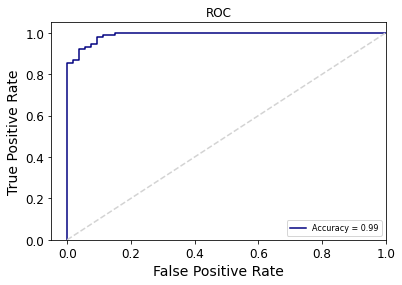

In [147]:
from sklearn.metrics import roc_curve, auc
y_score2 = nbclf.predict_proba(X_test2)

false_positive_rate2, true_positive_rate2, thresholds = roc_curve(y_test2, y_score2[:,1])

roc_auc2 = auc(false_positive_rate2, true_positive_rate2)
print('Accuracy = ', roc_auc2)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate2, true_positive_rate2, c=color, label=('Accuracy = %0.2f'%roc_auc2))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## TW5 Tasks

## Part 1

- Dataset: iris.csv is stored in a folder data

- Your modeling analysis should be done on two different datasets, (1) the original dataset and (b) Normalized data using min-max normalization. 

- Apply (1) Naive Bayes classifiers 

- A framework of k-cross validation (k = 10)

- Display confusion matrix (a matrix with numbers)

- Print a summary of performance metrics

- Plot ROC curves



### Submissions

- Upload your notebook on GitHub repo and provide an URL to the file.

- Write a summary of the analysis and submit it to Canvas. Your summary should include the comparisons of the two models and the model peformance based on parameters (e.g., k value in k-NN classifier).


In [148]:
# Where to save the figures
PROJECT_ROOT_DIR = "."

CHAPTER_ID = 'iris.csv'
IRIS_PATH = os.path.join(PROJECT_ROOT_DIR, "data", CHAPTER_ID)
print(IRIS_PATH)
df = pd.read_csv(IRIS_PATH)
print(df.head)

.\data\iris.csv
<bound method NDFrame.head of      SepalLength  SepalWidth  PetalLength  PetalWidth            Name  Class
0            5.1         3.5          1.4         0.2     Iris-setosa      0
1            4.9         3.0          1.4         0.2     Iris-setosa      0
2            4.7         3.2          1.3         0.2     Iris-setosa      0
3            4.6         3.1          1.5         0.2     Iris-setosa      0
4            5.0         3.6          1.4         0.2     Iris-setosa      0
..           ...         ...          ...         ...             ...    ...
145          6.7         3.0          5.2         2.3  Iris-virginica      2
146          6.3         2.5          5.0         1.9  Iris-virginica      2
147          6.5         3.0          5.2         2.0  Iris-virginica      2
148          6.2         3.4          5.4         2.3  Iris-virginica      2
149          5.9         3.0          5.1         1.8  Iris-virginica      2

[150 rows x 6 columns]>


In [149]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name',
       'Class'],
      dtype='object')

In [150]:
df.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
 5   Class        150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [152]:
col = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

### Your modeling analysis should be done on two different datasets, (1) the original dataset and (b) Normalized data using min-max normalization. 

In [153]:
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing

In [154]:
min_max = preprocessing.MinMaxScaler()
scaled_df = min_max.fit_transform(df[col].values)
normal_df = pd.DataFrame(scaled_df, columns=col)

In [155]:
normal_df.head(2)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667


In [156]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
 5   Class        150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Apply (1) Naive Bayes classifiers 

In [158]:
X = df.iloc[:, : 4].to_numpy() 
print(X.shape)

(150, 4)


In [159]:
print(df)

     SepalLength  SepalWidth  PetalLength  PetalWidth            Name  Class
0            5.1         3.5          1.4         0.2     Iris-setosa      0
1            4.9         3.0          1.4         0.2     Iris-setosa      0
2            4.7         3.2          1.3         0.2     Iris-setosa      0
3            4.6         3.1          1.5         0.2     Iris-setosa      0
4            5.0         3.6          1.4         0.2     Iris-setosa      0
..           ...         ...          ...         ...             ...    ...
145          6.7         3.0          5.2         2.3  Iris-virginica      2
146          6.3         2.5          5.0         1.9  Iris-virginica      2
147          6.5         3.0          5.2         2.0  Iris-virginica      2
148          6.2         3.4          5.4         2.3  Iris-virginica      2
149          5.9         3.0          5.1         1.8  Iris-virginica      2

[150 rows x 6 columns]


In [160]:
X = df.iloc[:, : 4].to_numpy() 

y = df['Class'].to_numpy() 

from sklearn.model_selection import train_test_split  

from sklearn.naive_bayes import GaussianNB 

from adspy_shared_utilities import plot_class_regions_for_classifier 

  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  

nbclf = GaussianNB().fit(X_train, y_train) 


In [161]:
print(nbclf.score(X_test, y_test))

1.0


In [162]:
y_pred = nbclf.predict(X_test)

# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [163]:
# Print classification report
target_names = ['Class 0', 'Class 1','Class2']

result_metrics = classification_report(y_test, y_pred, target_names=target_names)

from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier
print(result_metrics)

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        13
     Class 1       1.00      1.00      1.00        16
      Class2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [164]:
from sklearn.metrics import roc_curve, auc
y_score = nbclf.predict_proba(X_test)


In [165]:
X_normal = normal_df.iloc[:, :4].to_numpy() 

y_normal = df['Class'].to_numpy() 

from sklearn.model_selection import train_test_split  

from sklearn.naive_bayes import GaussianNB 

from adspy_shared_utilities import plot_class_regions_for_classifier 

  
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X_normal, y_normal, random_state=0)  

nbclf_N = GaussianNB().fit(X_trainN, y_trainN) 


In [166]:
print(nbclf_N.score(X_testN, y_testN))

1.0


In [167]:
y_predN = nbclf_N.predict(X_test)

# plot a confusion matrix
confusion_mat_N = confusion_matrix(y_testN, y_predN)

print(confusion_mat_N)

[[ 0  0 13]
 [ 0  0 16]
 [ 0  0  9]]


In [168]:
# Print classification report
target_names= ['Class 0', 'Class 1','Class2']

result_metrics_N = classification_report(y_testN, y_predN, target_names=target_names)

print(result_metrics_N)

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        13
     Class 1       0.00      0.00      0.00        16
      Class2       0.24      1.00      0.38         9

    accuracy                           0.24        38
   macro avg       0.08      0.33      0.13        38
weighted avg       0.06      0.24      0.09        38



C:\Users\xiexi\anaconda3\envs\CPSC5610\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xiexi\anaconda3\envs\CPSC5610\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xiexi\anaconda3\envs\CPSC5610\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K-Fold 

### Stocastic Gradient Descent (SGD) classifier

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html 

In [169]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [170]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.89473684, 0.67567568, 0.94594595])

In [171]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into k folds 

kf

KFold(n_splits=10, random_state=None, shuffle=True)

In [172]:
y_b= df['Class']

In [173]:
target_names = ['0', '1', '2']

c0_precisions = []
c0_recalls = []
c1_precisions = []
c1_recalls = []
c2_precisions = []
c2_recalls = []
for train_index, test_index in kf.split(X):
    
    X_train, y_train = X[train_index], y_b[train_index]
    X_test, y_test = X[test_index], y_b[test_index]

    sgd_clf.fit(X_train, y_train)
    y_pred = sgd_clf.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    
    # Get a dictionary of performance results and access the results
    results = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    # example
    c0_precisions.append(results['0']['precision'])
    c0_recalls.append(results['0']['recall'])
    c1_precisions.append(results['1']['precision'])
    c1_recalls.append(results['1']['recall'])
    c1_precisions.append(results['2']['precision'])
    c1_recalls.append(results['2']['recall'])
    
print('Class_0: precision', sum(c0_precisions)/3)
print('Class_0: recall', sum(c0_recalls)/3)

print('Class_1: precision', sum(c1_precisions)/3)
print('Class_1: recall', sum(c1_recalls)/3)

print('Class_2: precision', sum(c2_precisions)/3)
print('Class_2: recall', sum(c2_recalls)/3)

[[6 0 0]
 [0 6 0]
 [0 0 3]]
[[4 0 0]
 [3 0 0]
 [0 0 8]]
[[9 0 0]
 [4 0 0]
 [0 0 2]]
[[4 0 0]
 [0 6 0]
 [0 1 4]]
[[6 0 0]
 [4 0 0]
 [0 0 5]]
[[6 0 0]
 [0 5 1]
 [0 0 3]]
[[5 0 0]
 [0 4 0]
 [0 3 3]]
[[3 0 0]
 [4 2 0]
 [0 0 6]]

C:\Users\xiexi\anaconda3\envs\CPSC5610\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xiexi\anaconda3\envs\CPSC5610\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xiexi\anaconda3\envs\CPSC5610\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xiex


[[5 0 0]
 [3 0 2]
 [0 0 5]]
[[2 0 0]
 [0 6 0]
 [0 0 7]]
Class_0: precision 2.6391025641025645
Class_0: recall 3.3333333333333335
Class_1: precision 4.964285714285714
Class_1: recall 4.822222222222222
Class_2: precision 0.0
Class_2: recall 0.0


C:\Users\xiexi\anaconda3\envs\CPSC5610\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xiexi\anaconda3\envs\CPSC5610\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\xiexi\anaconda3\envs\CPSC5610\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###  ROC

In [174]:
X_test.shape

(15, 4)

In [175]:
from sklearn.metrics import roc_auc_score, auc

y_score = nbclf.predict_proba(X_test)

print(y_score.shape)
y_score[0]

(15, 3)


array([1.00000000e+00, 1.45880483e-17, 1.35652832e-26])

In [176]:
print(y_score[:,1])

[1.45880483e-17 2.45293357e-14 4.03393355e-01 9.99887821e-01
 9.98947593e-01 9.99593367e-01 9.99985093e-01 9.99915567e-01
 8.37278307e-08 1.19214841e-03 9.77243657e-01 1.10514699e-03
 1.18626155e-02 3.68217091e-07 4.27012480e-02]


In [177]:
print(y_pred)

[0 0 1 1 1 1 1 1 2 2 2 2 2 2 2]


### ROC-AUC score is meant for classification problems where the output is the probability of the input belonging to a class. If you do a multi-class classification, then you can compute the score for each class independently.

Moreover, the predict method returns a discrete class, not a probability. Let's imagine you do a binary classification and have only one example, it should be classified as False. If your classifier yields a probability of 0.7, the ROC-AUC value is 1.0-0.7=0.3. If you use the predict method, the ROC-AUC value will be 1.0-1.0=0.0, which won't tell you much. 

In [178]:

#false_positive_rate, true_positive_rate, thresholds = roc_auc_score(y_test, y_pred, multi_class='ovr')

#roc_auc = auc(false_positive_rate, true_positive_rate)
#print('Accuracy = ', roc_auc)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc = roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')
print('Accuracy = ', roc_auc)


#roc_auc = auc(false_positive_rate, true_positive_rate)

Accuracy =  0.9914


In [179]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold


In [180]:
col = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

In [181]:
X= df[col]

In [182]:
y=df['Class']

In [183]:
test = df.loc[df['Class'] ==1]
print(test.shape)

(50, 6)


In [184]:
df = df.assign(zero = lambda y: y['Class']==0)
df = df.assign(one = lambda y: y['Class']==1)
df = df.assign(two = lambda y: y['Class']==2)

In [185]:
test1 = df.loc[df['one'] ==True]
print(test1.shape)

(50, 9)


In [186]:
df.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Class,zero,one,two
145,6.7,3.0,5.2,2.3,Iris-virginica,2,False,False,True
146,6.3,2.5,5.0,1.9,Iris-virginica,2,False,False,True
147,6.5,3.0,5.2,2.0,Iris-virginica,2,False,False,True
148,6.2,3.4,5.4,2.3,Iris-virginica,2,False,False,True
149,5.9,3.0,5.1,1.8,Iris-virginica,2,False,False,True


In [187]:
df['zero'] = df['zero'].map({True: 0, False: 1})
df['one'] = df['one'].map({True: 0, False: 1})
df['two'] = df['two'].map({True: 0, False: 1})

In [188]:
df.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Class,zero,one,two
145,6.7,3.0,5.2,2.3,Iris-virginica,2,1,1,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2,1,1,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2,1,1,0
148,6.2,3.4,5.4,2.3,Iris-virginica,2,1,1,0
149,5.9,3.0,5.1,1.8,Iris-virginica,2,1,1,0


In [189]:
y_0=df['zero']
y_1=df['one']
y_2 = df['two']

In [190]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X, y_0, random_state=0)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y_1, random_state=0)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y_2, random_state=0)

nbclf_0 = GaussianNB().fit(X_train_0, y_train_0)
nbclf_1 = GaussianNB().fit(X_train_1, y_train_1)
nbclf_2= GaussianNB().fit(X_train_2, y_train_2)

In [202]:
score_0 = nbclf_0.score(X_test_0, y_test_0)
score_1 = nbclf_1.score(X_test_1, y_test_1)
score_2 = nbclf_2.score(X_test_2, y_test_2)

print(score_0, score_1, score_2)

1.0 1.0 0.8947368421052632


In [203]:
y_pred_0 = nbclf.predict(X_test_0)
y_pred_1 = nbclf.predict(X_test_1)
y_pred_2 = nbclf.predict(X_test_2)

# plot a confusion matrix
confusion_mat_0 = confusion_matrix(y_test_0, y_pred_0)
confusion_mat_1 = confusion_matrix(y_test_1, y_pred_1)
confusion_mat_2 = confusion_matrix(y_test_2, y_pred_2)

print(confusion_mat_0)
print(confusion_mat_1)
print(confusion_mat_2)

[[13  0  0]
 [ 0 16  9]
 [ 0  0  0]]
[[ 0 16  0]
 [13  0  9]
 [ 0  0  0]]
[[ 0  0  9]
 [13 16  0]
 [ 0  0  0]]


Accuracy_0 =  1.0
Accuracy_1 =  1.0
Accuracy_2 =  0.9885057471264367


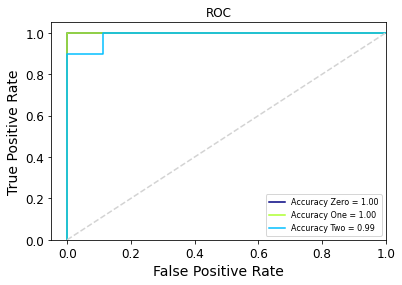

In [204]:
from sklearn.metrics import roc_curve, auc
y_score_0 = nbclf_0.predict_proba(X_test_0)
y_score_1 = nbclf_1.predict_proba(X_test_1)
y_score_2 = nbclf_2.predict_proba(X_test_2)

false_positive_rate_0, true_positive_rate_0, thresholds_0 = roc_curve(y_test_0, y_score_0[:,1])
false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test_1, y_score_1[:,1])
false_positive_rate_2, true_positive_rate_2, thresholds_2 = roc_curve(y_test_2, y_score_2[:,1])

roc_auc_0 = auc(false_positive_rate_0, true_positive_rate_0)
roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1)
roc_auc_2 = auc(false_positive_rate_2, true_positive_rate_2)
print('Accuracy_0 = ', roc_auc_0)
print('Accuracy_1 = ', roc_auc_1)
print('Accuracy_2 = ', roc_auc_2)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color_0 = colorSet[count-1]
color_1 = colorSet[count]
color_2 = colorSet[count+1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate_0, true_positive_rate_0, c=color_0, label=('Accuracy Zero = %0.2f'%roc_auc_0))
plt.plot(false_positive_rate_1, true_positive_rate_1, c=color_1, label=('Accuracy One = %0.2f'%roc_auc_1))
plt.plot(false_positive_rate_2, true_positive_rate_2, c=color_2, label=('Accuracy Two = %0.2f'%roc_auc_2))

plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
